In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import Requirement

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **Identifying Potential Areas for Urban Agriculture in Milan, Italy**

## **Challenge Background**

Urban farming plays a crucial role in the fight against climate change by supporting sustainable food production within cities. As urbanization continues to expand, integrating agriculture into urban areas not only strengthens local food security but also reduces transportation emissions and the carbon footprint associated with conventional farming practices.

Additionally, urban farming contributes to the creation of green spaces, helps mitigate the urban heat island effect, and improves air quality. By connecting communities with locally grown food, it encourages environmental responsibility and raises awareness about the impact of traditional agriculture on climate change. Embracing urban farming is essential for the development of environmentally friendly and resilient cities, while also fostering a sustainable future in the face of global climate challenges.

## **The Problem**

Climate change and sustainable food production within cities.
Goal of the Project

1.  Selection of optimal locations for urban farming

    Develop an algorithm using machine learning to identify optimal urban locations for community gardens based on soil and climate data, sunlight exposure, and local conditions by using satellite images.

2. Crop Selection and Yield Prediction

    Use machine learning models to recommend the most suitable and resilient crop varieties based on historical climate data and local conditions.
    Implement predictive models for estimating crop yields to enhance planning and resource allocation.

3. Smart Pest Management

    Implement a machine learning-based pest prediction system to identify potential pest outbreaks and automate targeted interventions, reducing the reliance on chemical pesticides.


## **ExPloration Data Analysis for Crop Selection and Yield Prediction**

In [3]:
# Load Data

fruits_500 = pd.read_csv('/content/drive/MyDrive/Final_Synthetic_Data/Fruits/synthetic_fruits_normal_crop_data_500.csv')
salads_500 = pd.read_csv('/content/drive/MyDrive/Final_Synthetic_Data/Salads/synthetic_salads_normal_crop_data_500.csv')
vegetables_500 = pd.read_csv('/content/drive/MyDrive/Final_Synthetic_Data/Vegetables/synthetic_veg_normal_crop_data_500.csv')

In [4]:
# view Data Frame head for all dataset
vegetables_500.head(2)

S. no.      Name   Soil_Type Fertility       Photoperiod N-P-K Ratio  \
0       1  Tomatoes  Sandy Loam      High  Short Day Period    10:10:10   
1       1  Tomatoes  Sandy Loam      High  Short Day Period    10:10:10   

   Temperature    Rainfall        pH  Light_Hours  Light_Intensity         Rh  \
0    21.040031  487.325073  6.522558     6.957985       632.013531  54.621752   
1    26.488870  504.266109  5.546069     6.837064       554.684016  51.988385   

     Nitrogen  Phosphorus   Potassium      Yield Category_pH  Season  
0  138.825546  165.487412  339.745203  63.203719  low_acidic    Fall  
1  140.493337  163.022717  310.917259  61.772208  low_acidic  Spring

In [5]:
fruits_500.head(2)

S. no.   Name Fertility                    Photoperiod N-P-K Ratio  \
0       1  Apple      High  Short Day Period, Day Neutral  10-10-2010   
1       1  Apple      High  Short Day Period, Day Neutral  10-10-2010   

   Temperature     Rainfall        pH  Light_Hours  Light_Intensity  \
0    20.997203  1999.344290  6.721399    12.643912       766.474617   
1    19.758029   926.917606  6.382192    13.369919       761.809231   

          Rh   Nitrogen  Phosphorus   Potassium      Yield Category_pH  \
0  94.140153  87.520700   40.597576  163.188437  12.293638     neutral   
1  92.923465  82.987669   44.458826  171.589874  13.720460  low_acidic   

    Soil_Type Season  
0  Sandy Loam   Fall  
1  Sandy Loam   Fall

In [6]:
salads_500.head(2)

S. no.      Name Fertility                    Photoperiod N-P-K Ratio  \
0       1  Arugula   Moderate  Short Day Period, Day Neutral    10:10:10   
1       1  Arugula   Moderate  Short Day Period, Day Neutral    10:10:10   

   Temperature    Rainfall        pH  Light_Hours  Light_Intensity         Rh  \
0    18.110584  753.655976  7.345349    11.112575       282.855279  33.713520   
1    18.850599  742.087456  7.556046    11.025262       302.613320  33.464232   

     Nitrogen  Phosphorus   Potassium     Yield    Category_pH Soil_Type  \
0  155.427647  343.542928  160.888376  8.316393   low_alkaline     Loamy   
1  156.138430  342.736494  162.123286  7.038408        neutral     Loamy   

   Season  
0  Spring  
1    Fall

In [7]:
# Combine All Three Dataset to One DataSet

combined_df = pd.concat([fruits_500, salads_500, vegetables_500], axis=0, ignore_index=True)
combined_df.head()

S. no.   Name Fertility                    Photoperiod N-P-K Ratio  \
0       1  Apple      High  Short Day Period, Day Neutral  10-10-2010   
1       1  Apple      High  Short Day Period, Day Neutral  10-10-2010   
2       1  Apple      High  Short Day Period, Day Neutral  10-10-2010   
3       1  Apple      High  Short Day Period, Day Neutral  10-10-2010   
4       1  Apple      High  Short Day Period, Day Neutral  10-10-2010   

   Temperature     Rainfall        pH  Light_Hours  Light_Intensity  \
0    20.997203  1999.344290  6.721399    12.643912       766.474617   
1    19.758029   926.917606  6.382192    13.369919       761.809231   
2    19.655419  1378.598711  6.547786    13.030836       723.679169   
3    18.420548  1584.201207  6.555363    12.761573       779.238624   
4    21.477206  1627.817481  6.244333    13.287099       756.326354   

          Rh   Nitrogen  Phosphorus   Potassium      Yield Category_pH  \
0  94.140153  87.520700   40.597576  163.188437  12.293638     neutral   
1  92.923465  82.987669   44.458826  171.589874  13.720460  low_acidic   
2  92.214491  87.321224   40.192451  184.681165  12.840208     neutral   
3  93.284657  88.977480   43.257485  174.393700  13.181544  low_acidic   
4  93.817794  97.638530   40.366556  170.567769  12.510512  low_acidic   

    Soil_Type  Season  
0  Sandy Loam    Fall  
1  Sandy Loam    Fall  
2  Sandy Loam    Fall  
3  Sandy Loam    Fall  
4  Sandy Loam  Spring

In [8]:
# Find the size of the Dataset

print(f'The lenght of the Combined datasets is {combined_df.shape}')

The lenght of the Combined datasets is (17000, 18)


In [9]:
# Check for Missing Values

combined_df.isna().values.any()

False

In [10]:
# Drop S/N of the Dataset

crop = combined_df.drop('S. no.', axis=1)
crop.head()

Name Fertility                    Photoperiod N-P-K Ratio  Temperature  \
0  Apple      High  Short Day Period, Day Neutral  10-10-2010    20.997203   
1  Apple      High  Short Day Period, Day Neutral  10-10-2010    19.758029   
2  Apple      High  Short Day Period, Day Neutral  10-10-2010    19.655419   
3  Apple      High  Short Day Period, Day Neutral  10-10-2010    18.420548   
4  Apple      High  Short Day Period, Day Neutral  10-10-2010    21.477206   

      Rainfall        pH  Light_Hours  Light_Intensity         Rh   Nitrogen  \
0  1999.344290  6.721399    12.643912       766.474617  94.140153  87.520700   
1   926.917606  6.382192    13.369919       761.809231  92.923465  82.987669   
2  1378.598711  6.547786    13.030836       723.679169  92.214491  87.321224   
3  1584.201207  6.555363    12.761573       779.238624  93.284657  88.977480   
4  1627.817481  6.244333    13.287099       756.326354  93.817794  97.638530   

   Phosphorus   Potassium      Yield Category_pH   Soil_Type  Season  
0   40.597576  163.188437  12.293638     neutral  Sandy Loam    Fall  
1   44.458826  171.589874  13.720460  low_acidic  Sandy Loam    Fall  
2   40.192451  184.681165  12.840208     neutral  Sandy Loam    Fall  
3   43.257485  174.393700  13.181544  low_acidic  Sandy Loam    Fall  
4   40.366556  170.567769  12.510512  low_acidic  Sandy Loam  Spring

#**Exploratory Data Analysis**

In [11]:
# A brief Data Description

crop.describe()

Temperature      Rainfall            pH   Light_Hours  \
count  17000.000000  17000.000000  17000.000000  17000.000000   
mean      21.984485   1048.367079      6.236952     10.713199   
std        4.375642    372.222546      0.837361      2.706494   
min        7.816589    414.882029      3.038367      4.908668   
25%       18.831189    756.067046      6.024785      7.481345   
50%       21.419236    995.067494      6.432759     12.026754   
75%       24.716080   1200.380766      6.684619     13.037446   
max       39.598185   2553.318516      7.985546     16.293481   

       Light_Intensity            Rh      Nitrogen    Phosphorus  \
count     17000.000000  17000.000000  17000.000000  17000.000000   
mean        427.180064     75.614544    143.033285     97.716371   
std         210.488602     19.222200     59.998022     69.594786   
min          70.777411     31.016205     40.382485     13.236823   
25%         260.281444     55.857679    107.443664     47.188420   
50%         401.071713     87.084603    140.302071     70.876068   
75%         572.420082     92.466089    163.409646    128.494563   
max        1026.633918    100.057085    397.728024    358.228449   

          Potassium         Yield  
count  17000.000000  17000.000000  
mean     178.372968     17.814954  
std       90.458597     14.547144  
min       30.767957      0.710081  
25%      118.604458      6.322178  
50%      174.478922     15.858827  
75%      223.143848     23.604851  
max      577.930622     65.818904

In [12]:
# Divide the data set into subset categorical and Numerical Columns respectively

cat_col = crop.select_dtypes(include='O').columns
num_col = crop.select_dtypes(exclude='O').columns

In [13]:
# Count of crop

crop.Name.value_counts()

Name
Apple             500
Eggplants         500
Endive            500
Kale              500
Lettuce           500
Radicchio         500
Spinach           500
Tomatoes          500
Asparagus         500
Orange            500
Chilli Peppers    500
Cabbage           500
Cucumbers         500
Potatoes          500
Cauliflowers      500
Broccoli          500
Cress             500
Chard             500
Beet              500
Arugula           500
plum              500
pear              500
apricot           500
Grapes            500
Watermelon        500
Kiwi              500
Lemon             500
Cherries          500
Figs              500
Strawberry        500
Blueberry         500
Peach             500
Pomegranate       500
Green Peas        500
Name: count, dtype: int64

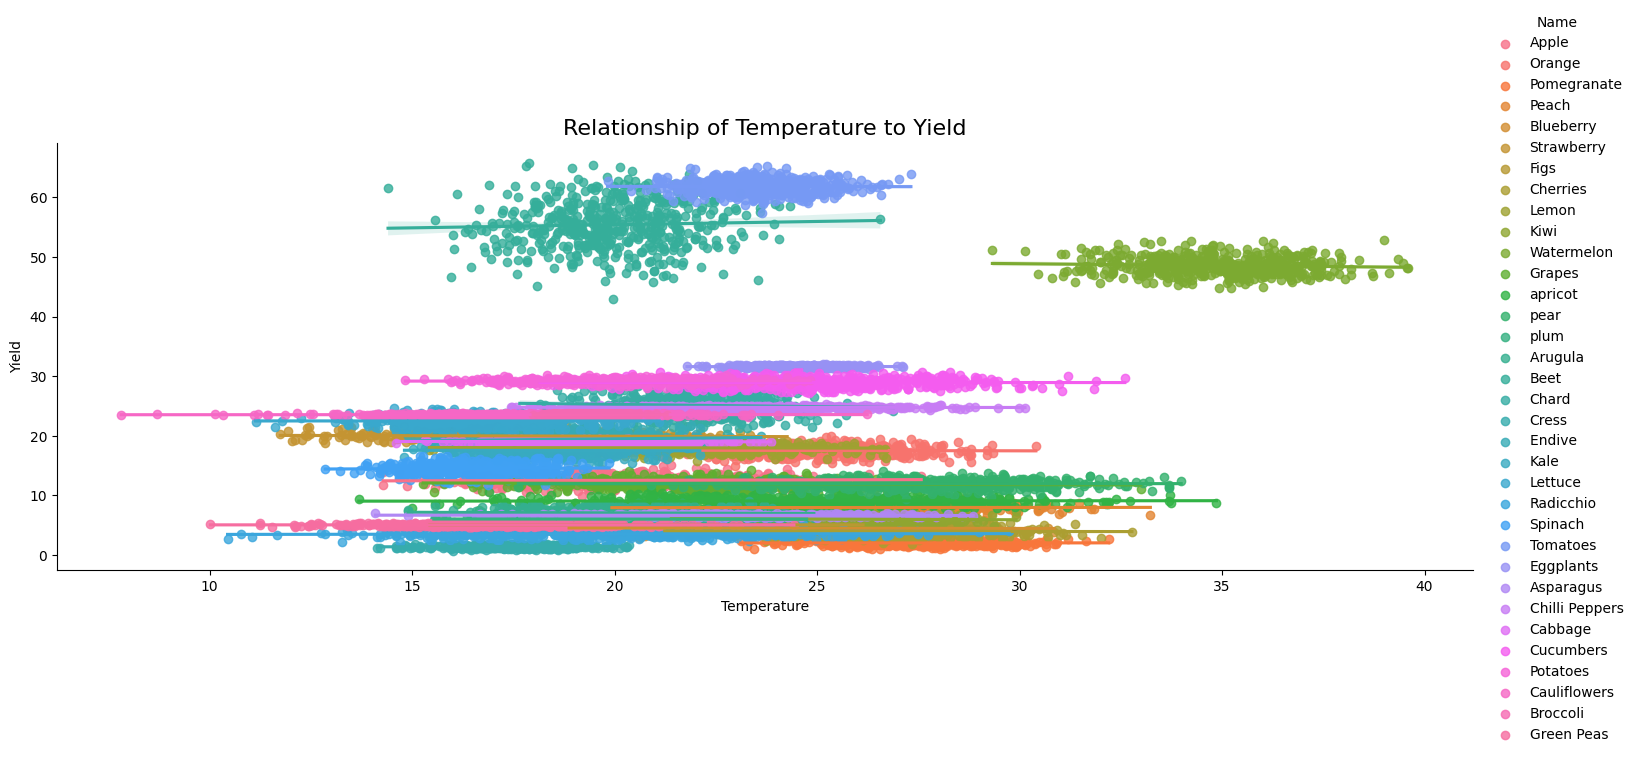

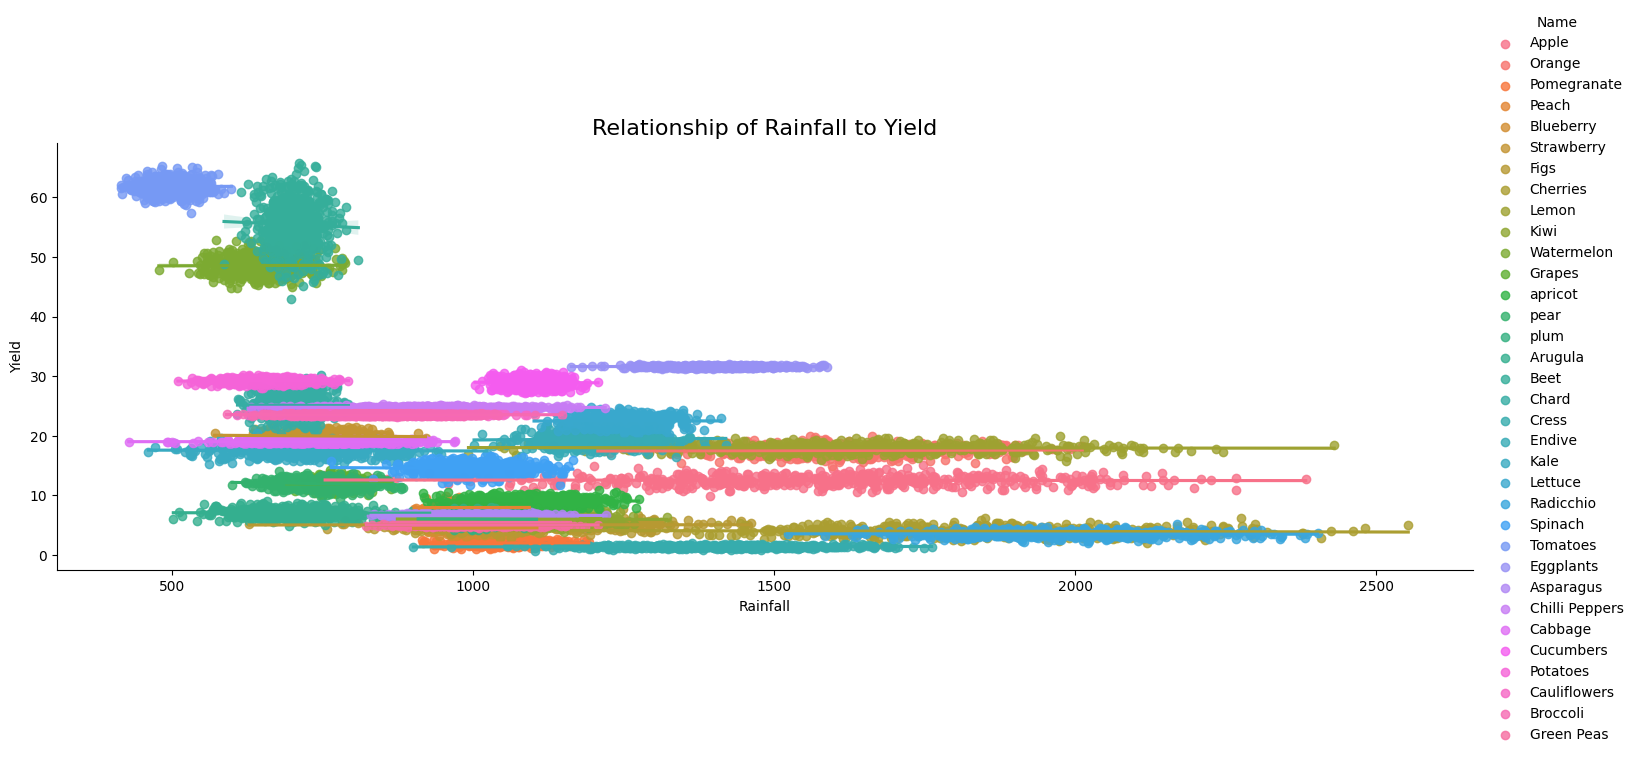

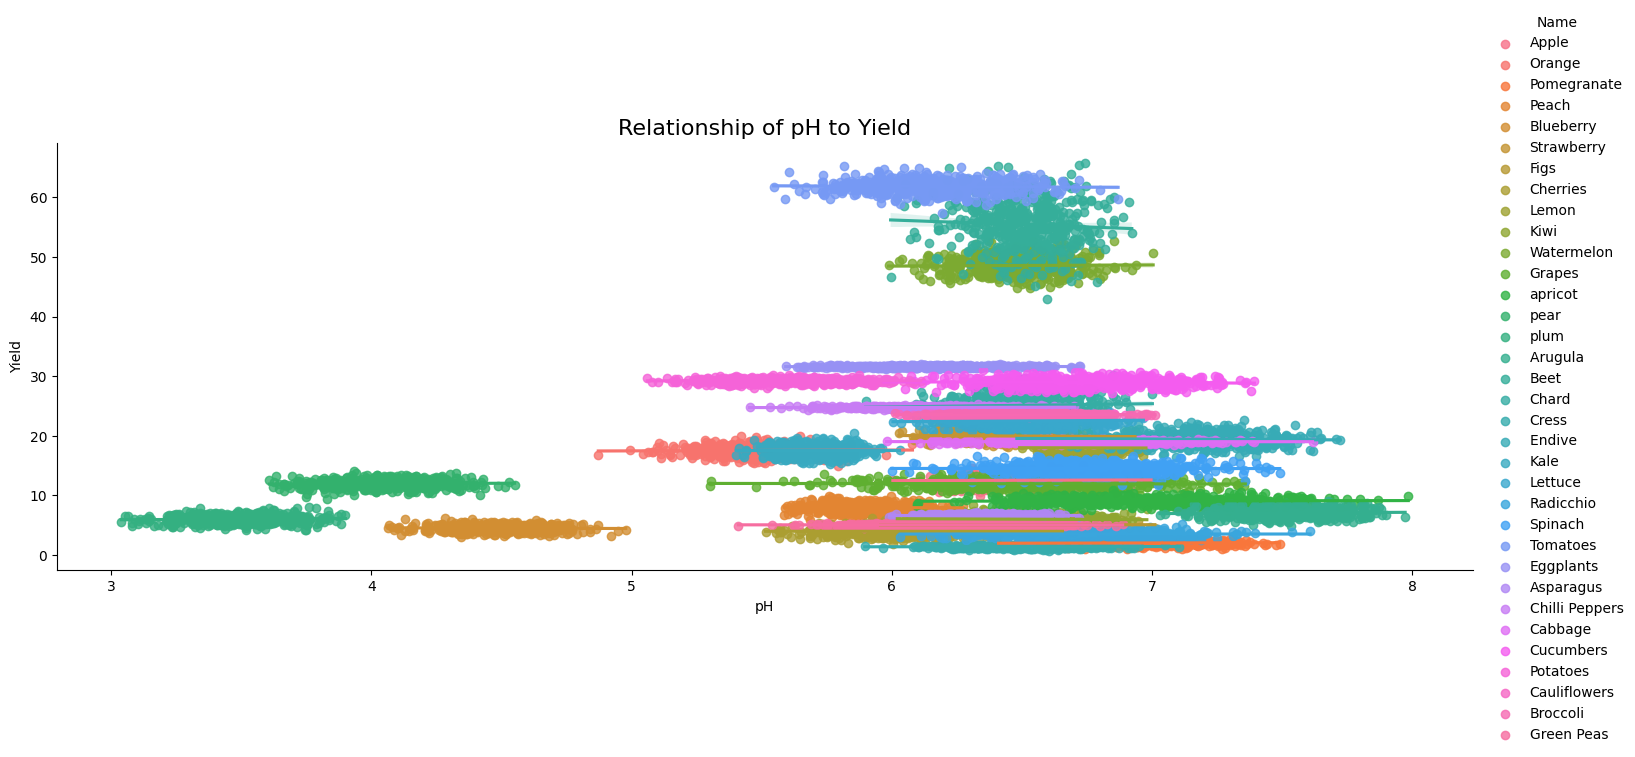

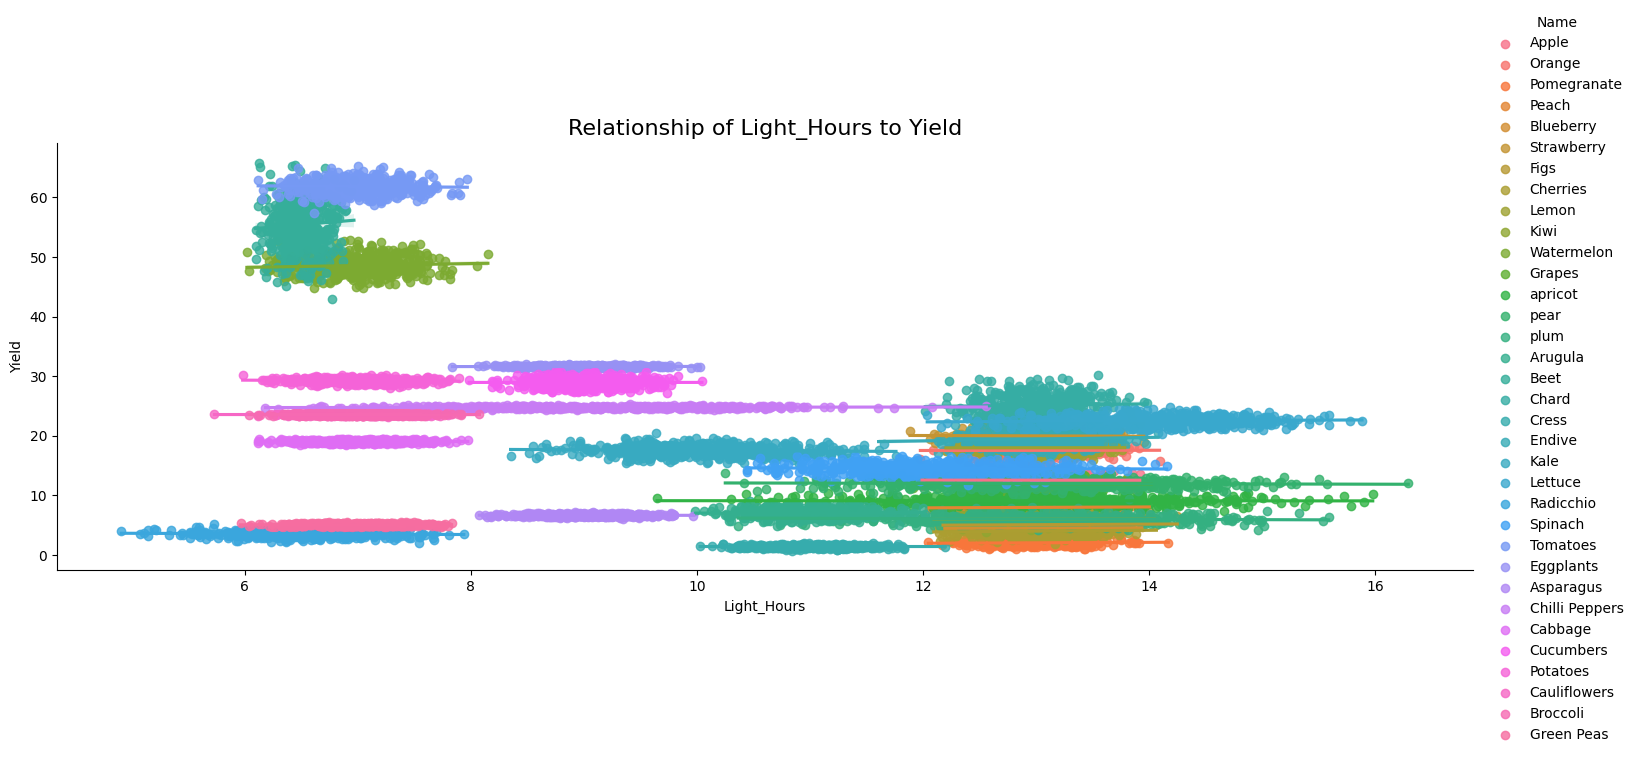

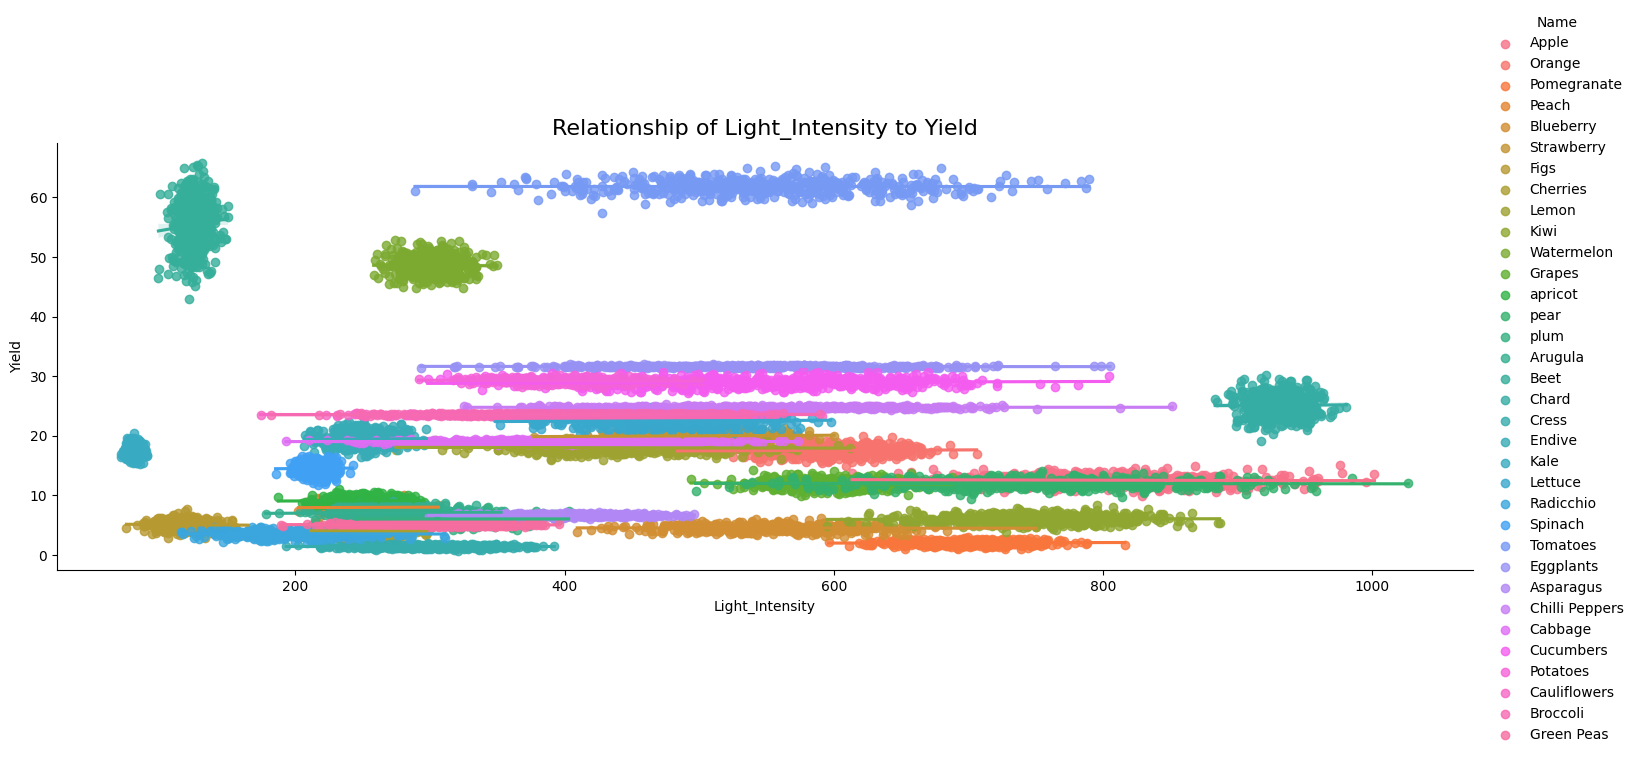

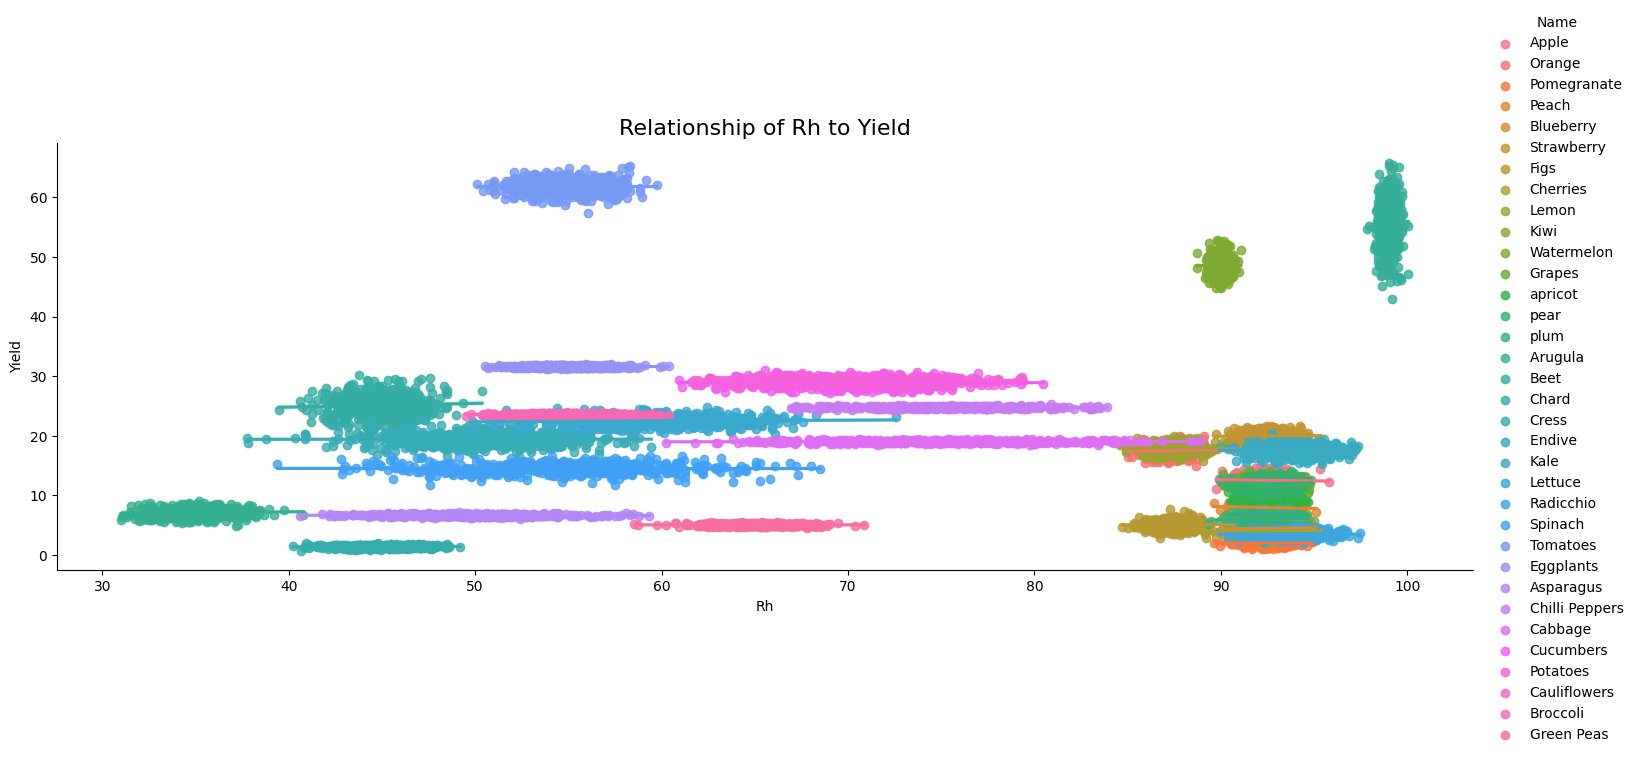

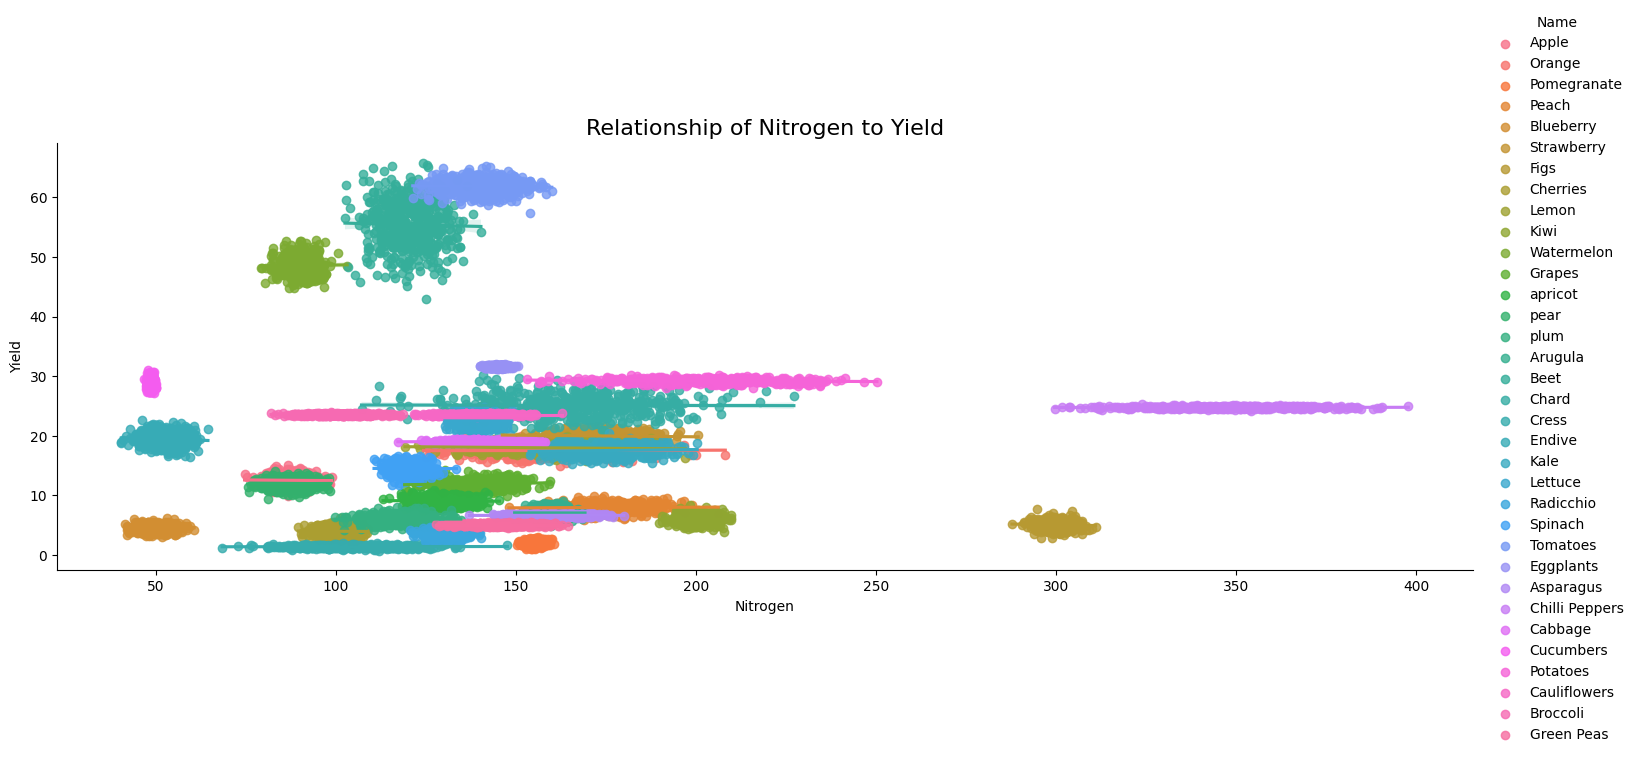

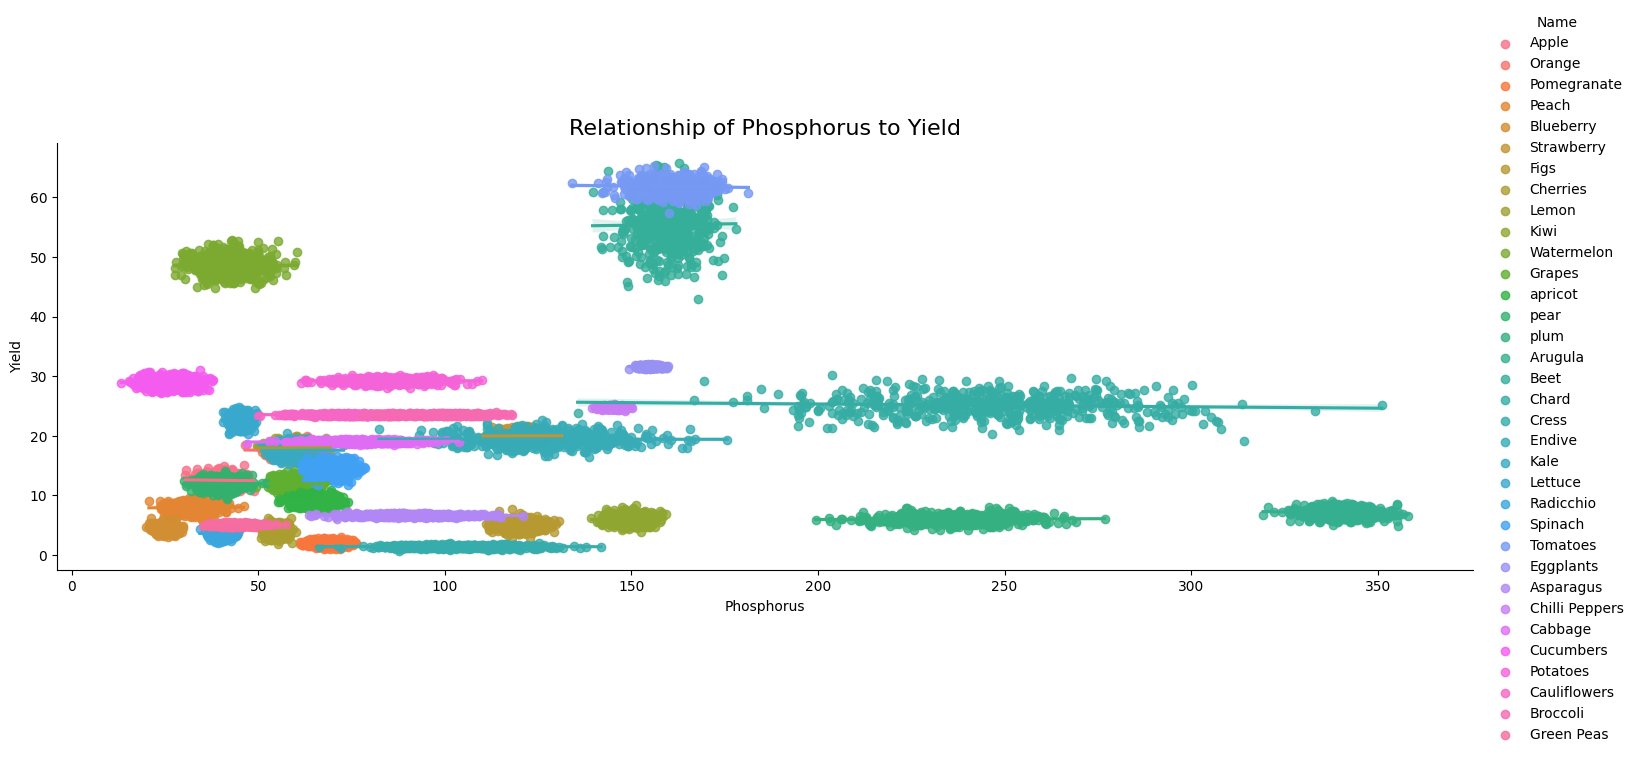

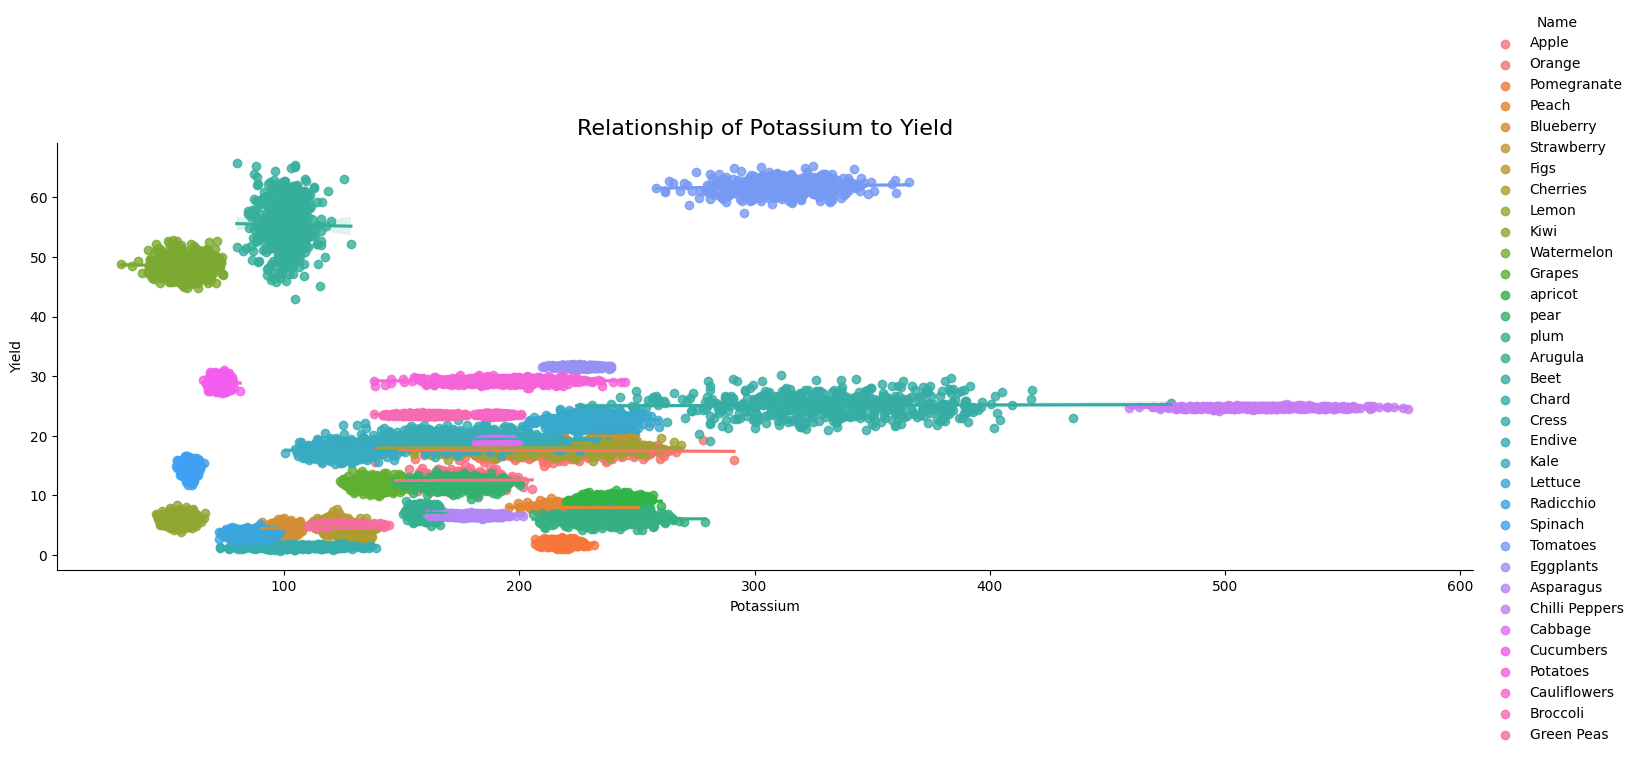

In [14]:
# Plot of Numerical Columns to show the Relationship to Yield

for i, variable in enumerate(crop, 1):
  if variable != 'Yield' and variable not in cat_col:
    sns.lmplot(crop, x=variable, y='Yield', hue='Name', height=5, aspect=3)
    plt.title(f'Relationship of {variable} to Yield', fontsize=16)

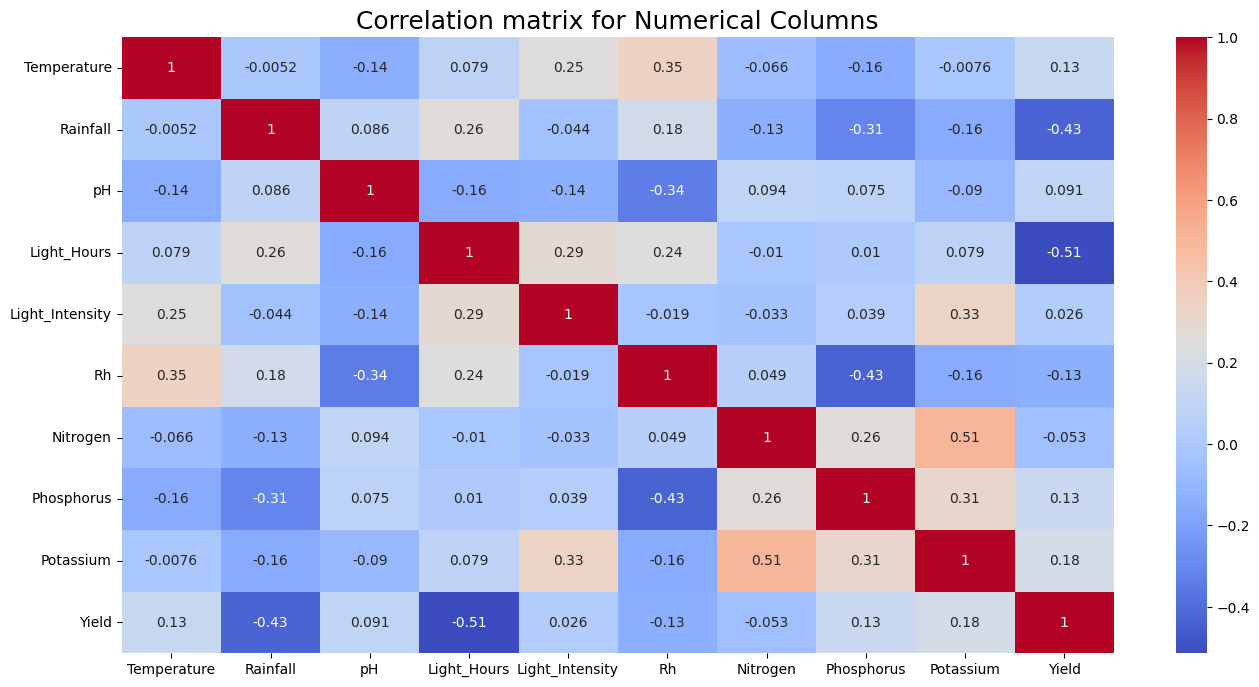

In [15]:
# Find the Correlation matrix Numerical Columns

crop_corr = crop[num_col].corr( )

plt.figure(figsize=(16, 8))
sns.heatmap(crop_corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix for Numerical Columns', fontsize=18)
plt.show()

In [16]:
# Find the Relationship of Categorical Columns to Yield

from scipy.stats import chi2_contingency
crosstab = pd.crosstab(index=crop.Fertility, columns=crop.Yield)

In [17]:
def is_corr(x, y):
  crosstab = pd.crosstab(index=x, columns=y)
  chi_sq_result = chi2_contingency(crosstab)
  p, x, dof= chi_sq_result.pvalue, 'reject' if chi_sq_result.pvalue < 0.05 else 'accept', chi_sq_result.dof
  return p, x, dof

In [18]:
for col_name in cat_col:
  print(f'{col_name}: \nThe p-value is {is_corr(crop[col_name], crop.Yield)[0]} hence, we {is_corr(crop[col_name], crop.Yield)[1]} the null hypothesis with {is_corr(crop[col_name], crop.Yield)[2]} degree of Freedom\n\n')

Name: 
The p-value is 0.48732216707123654 hence, we accept the null hypothesis with 560967 degree of Freedom


Fertility: 
The p-value is 0.4959203511769462 hence, we accept the null hypothesis with 33998 degree of Freedom


Photoperiod: 
The p-value is 0.49541987465782444 hence, we accept the null hypothesis with 50997 degree of Freedom


N-P-K Ratio: 
The p-value is 0.49238974268378743 hence, we accept the null hypothesis with 186989 degree of Freedom


Category_pH: 
The p-value is 0.4949517481161123 hence, we accept the null hypothesis with 67996 degree of Freedom


Soil_Type: 
The p-value is 0.49373075674931277 hence, we accept the null hypothesis with 118993 degree of Freedom


Season: 
The p-value is 0.4933707792657615 hence, we accept the null hypothesis with 135992 degree of Freedom




# **Future Engineering**

In [19]:
# Create a copy of crop dataSet

crop_update = crop.copy()

In [20]:
# Calculate the Nutrient Uptake for independent Nutrient, The derivative is given by Yield Multiply Nutrient content divide by 100

crop_update.insert(13, column='N Nutrient Uptake', value=(crop_update.Yield.values * crop_update.Nitrogen.values) / 100)
crop_update.insert(14, column='P Nutrient Uptake', value=(crop_update.Yield.values * crop_update.Potassium.values) / 100)
crop_update.insert(15, column='K Nutrient Uptake', value=(crop_update.Yield.values * crop_update.Phosphorus.values) / 100)

In [21]:
# Water Nutrient Intaraction values with NPK is given by Rainfall multiply by the sum of NPK

WN = crop_update.Rainfall * (crop_update.Nitrogen + crop_update.Phosphorus + crop_update.Potassium)
crop_update.insert(16, column='Water Nutrient', value=WN)

In [22]:
# pH Nutrient Intaraction values with NPK is given by pH multiply by the sum of NPK

pH_Nutrient = crop_update.pH * (crop_update.Nitrogen + crop_update.Phosphorus + crop_update.Potassium)
crop_update.insert(17, column='pH-Nutrient', value=pH_Nutrient)

In [23]:
# Additional pH required currentis the changes in pH and optimal pH

optimum_pH = crop_update.pH.max()
crop_update.insert(7, column='pH Defeciecy', value=optimum_pH - crop_update.pH)

In [24]:
# Additional pH required currentis the changes in pH and optimal pH

optimum_potassium = crop_update.Potassium.max()
optimum_Phosphorus = crop_update.Phosphorus.max()
optimum_Nitrogen = crop_update.Nitrogen.max()

crop_update.insert(12, column='Nitrogen Defeciecy', value=optimum_pH - crop_update.pH)
crop_update.insert(14, column='Potassium Defeciecy', value=optimum_pH - crop_update.pH)
crop_update.insert(13, column='Phosphorus Defeciecy', value=optimum_pH - crop_update.pH)

In [25]:
# Total Nutrient Available

Total_Avail_Nutrient = crop_update.Nitrogen + crop_update.Potassium + crop_update.Phosphorus
crop_update.insert(22, column='Total Avail Nutrient', value=Total_Avail_Nutrient)

In [26]:
#Ratio of Individual Nutrients

crop_update.insert(23, column='Avail Ratio Of Nitrogen', value=crop_update.Nitrogen / crop_update['Total Avail Nutrient'] * 10)
crop_update.insert(24, column='Avail Ratio Of Potassium', value=crop_update.Potassium / crop_update['Total Avail Nutrient'] * 10)
crop_update.insert(25, column='Avail Ratio Of Phosphorus', value=crop_update.Phosphorus / crop_update['Total Avail Nutrient'] * 10)


In [27]:
# Split Photoperiod into unque periods

photoperiod = crop_update.Photoperiod.str.split(',', expand=True).replace({' Day Neutral':'Day Neutral', ' Long Day Period':'Long Day Period'})
variable_names = list(set(list(photoperiod[0].value_counts().index) + list(photoperiod[1].value_counts().index) + list(photoperiod[2].value_counts().index)))


# crop_update.insert(3, column=variable_names[1], value=photoperiod[0])
# crop_update.insert(4, column=variable_names[0], value=photoperiod[1])
# crop_update.insert(5, column=variable_names[2], value=photoperiod[2])


In [28]:
# Function to obtain values for the Unique periods

def split_photoperiod(column):
  bank = []
  for index, value in crop_update.iterrows():
    if column in crop_update.Photoperiod.str.split(',')[index]:
      bank.append('True')
    else:
      bank.append('False')
  return bank


In [29]:
# Insert the values of the new periods to the existing Data Frame

crop_update.insert(3, column=variable_names[1], value=split_photoperiod(variable_names[1]))
crop_update.insert(4, column=variable_names[0], value=split_photoperiod(variable_names[0]))
crop_update.insert(5, column=variable_names[2], value=split_photoperiod(variable_names[2]))


In [30]:
# Categorize the crops into Types (grouped the crops)

vegetables = crop_update.Name.isin(vegetables_500.Name)
fruits = crop_update.Name.isin(fruits_500.Name)
salads = crop_update.Name.isin(salads_500.Name)

crop_update.insert(1, column='Crop Type', value=crop_update.Name.where(vegetables, "Vegetable").where(fruits, "Fruit").where(salads, "Salads"))

In [31]:
# splited_NPK = crop_update['N-P-K Ratio'].str.split('-', expand=True)
# # crop_update.insert(4, column='N', value=pd.to_numeric(splited_NPK[0]) )
# # crop_update.insert(5, column='P', value=pd.to_numeric(splited_NPK[1]) )
# # crop_update.insert(6, column='K', value=pd.to_numeric(splited_NPK[2]) )
# splited_NPK

In [32]:
# Up of date Numerical Columns data bank

updates_num_col = [col_name for col_name in crop_update.columns if crop_update[col_name].dtype != 'O']

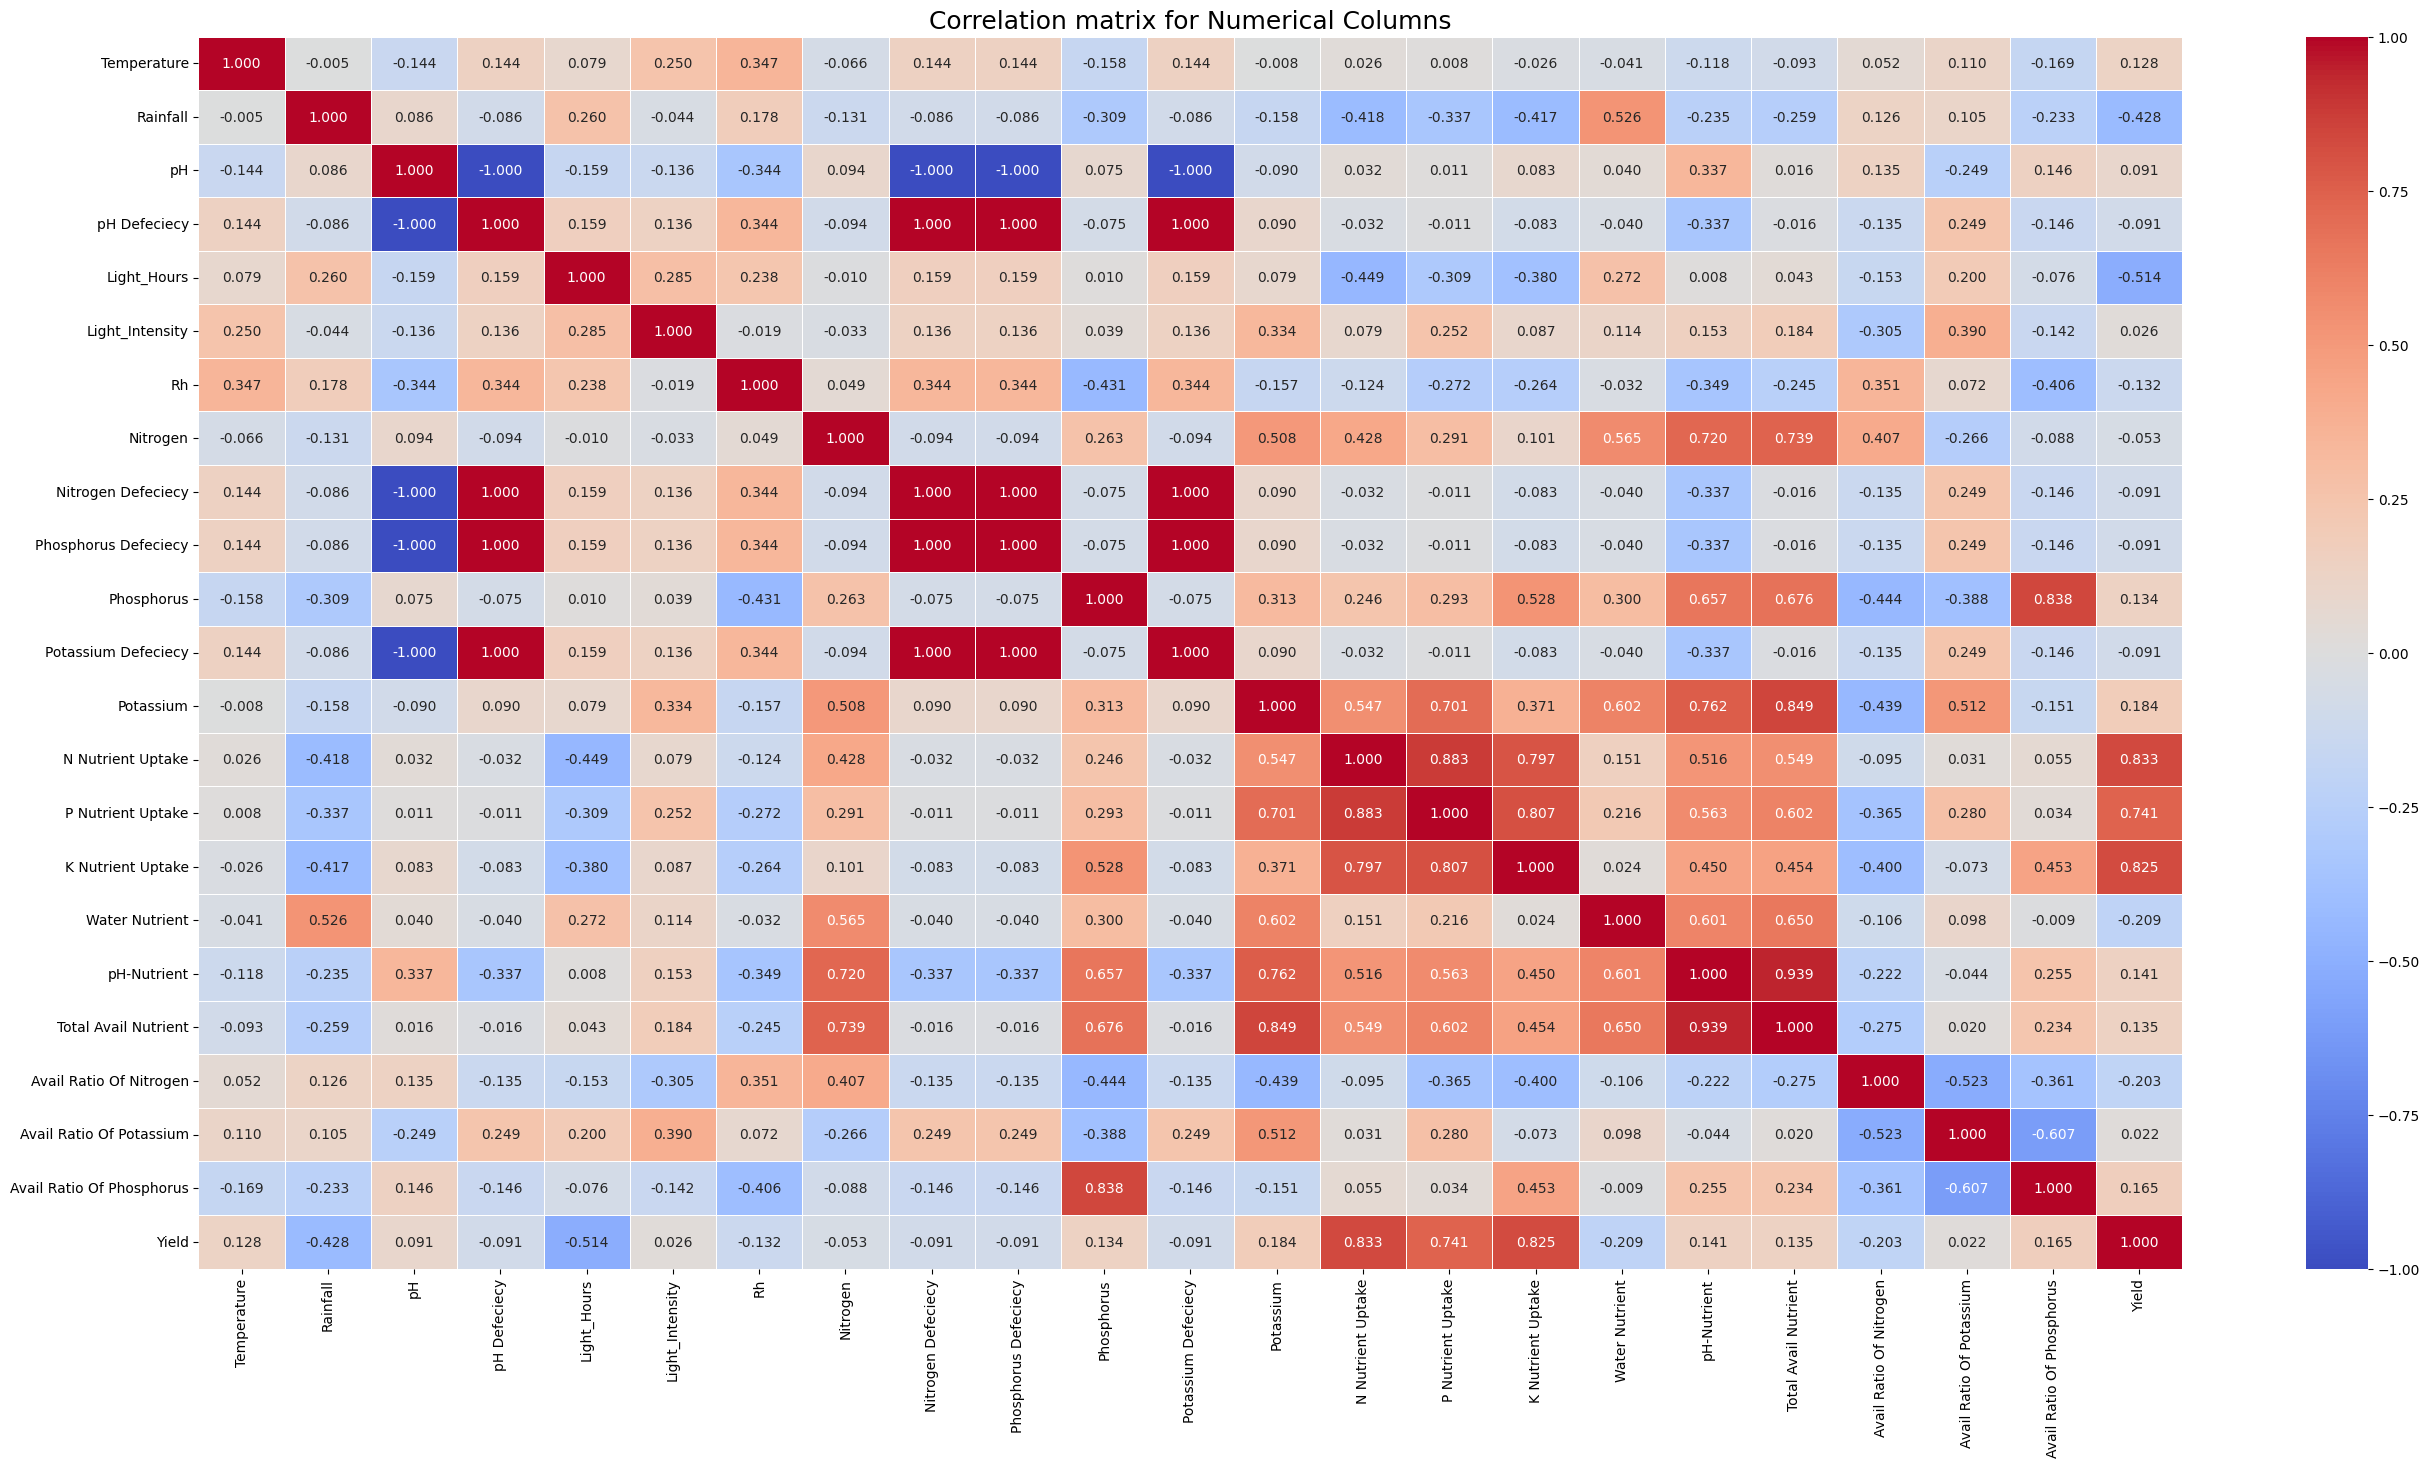

In [33]:
# Find the Correlation matrix updated Numerical Columns

crop_update_corr = crop_update[updates_num_col].corr()

plt.figure(figsize=(32, 16))
sns.heatmap(crop_update_corr, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('Correlation matrix for Numerical Columns', fontsize=18)
plt.show()

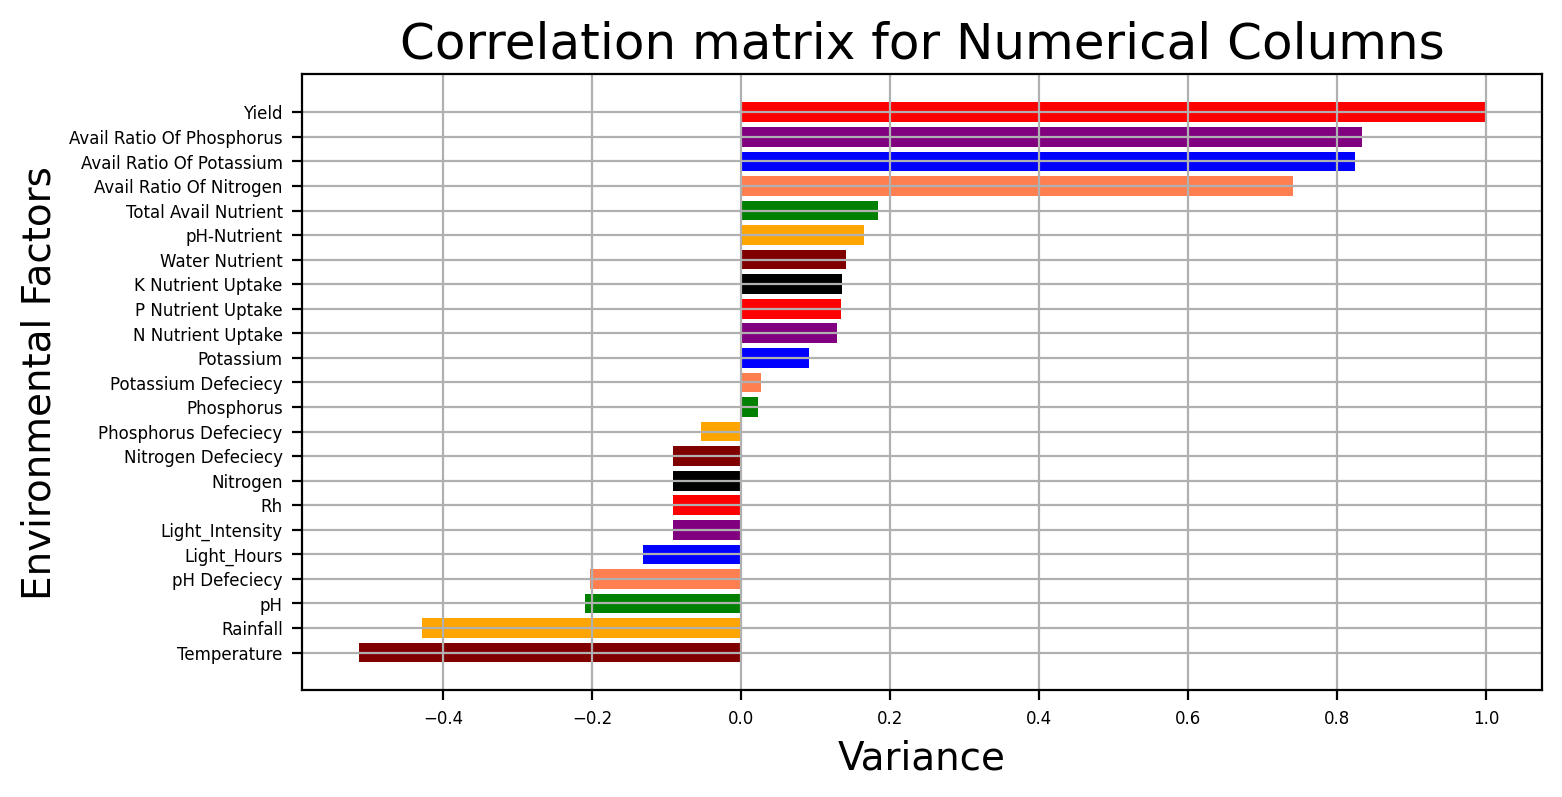

In [34]:
# creating the bar plot of Correlation matrix updated Numerical Columns
plt.figure(figsize=(8, 4), dpi=200, edgecolor='b')
plt.grid('grey')
plt.barh(crop_update_corr.index, crop_update_corr.Yield.sort_values(), color=['maroon', 'orange', 'green', 'coral', 'blue', 'purple', 'red', 'black'])
plt.xlabel("Variance", fontsize=14)
plt.ylabel("Environmental Factors", fontsize=14)
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)
plt.title("Correlation matrix for Numerical Columns", fontsize=18)

plt.show()

# **Feature Ranking in Association to Target**

A great first step is to construct a ranking with a **feature utility metric**, a function measuring associations between a feature and the target. Then you can choose a smaller set of the most useful features to develop initially and have more confidence that your time will be well spent.

The metric we'll use is called **"mutual information"**. Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.

Mutual information is a great general-purpose metric and especially useful at the start of feature development when you might not know what model you'd like to use yet. It is:

* easy to use and interpret,
* computationally efficient,
* theoretically well-founded,
* resistant to overfitting, and,
* able to detect any kind of relationship

## **Mutual Information and What it Measures**

Mutual information describes relationships in terms of uncertainty. The **mutual information (MI)** between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. If you knew the value of a feature, how much more confident would you be about the target?

## **Interpreting Mutual Information Scores**

The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. (Mutual information is a logarithmic quantity, so it increases very slowly.)

Here are some things to remember when applying mutual information:

* MI can help you to understand the relative potential of a feature as a predictor of the target, considered by itself.

* It's possible for a feature to be very informative when interacting with other features, but not so informative all alone. MI can't detect interactions between features. It is a univariate metric.

* The actual usefulness of a feature depends on the model you use it with. A feature is only useful to the extent that its relationship with the target is one your model can learn. Just because a feature has a high MI score doesn't mean your model will be able to do anything with that information. You may need to transform the feature first to expose the association.


### **Yield Prediction Mutual Infomation**

In [35]:
# Preparing Data for Mututal info

from sklearn.feature_selection import mutual_info_regression

crop_update_mi = crop_update.copy()

y = crop_update_mi.pop('Yield')
X = crop_update_mi

In [36]:
for colname in X.columns:
  if X[colname].dtypes == 'O':
    X[colname], _= X[colname].factorize()

discrete_features = X.dtypes == int

In [37]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [38]:
# Top 10 Result

mi_scores = pd.DataFrame(make_mi_scores(X, y, discrete_features)).reset_index().rename(columns={'index':'Variables'})
mi_scores[:10]

Variables  MI Scores
0                  Name   2.597210
1     P Nutrient Uptake   2.252040
2     N Nutrient Uptake   2.224512
3     K Nutrient Uptake   1.967801
4  Total Avail Nutrient   1.582426
5            Phosphorus   1.451709
6             Potassium   1.413591
7           pH-Nutrient   1.328777
8                    Rh   1.304017
9           N-P-K Ratio   1.293008

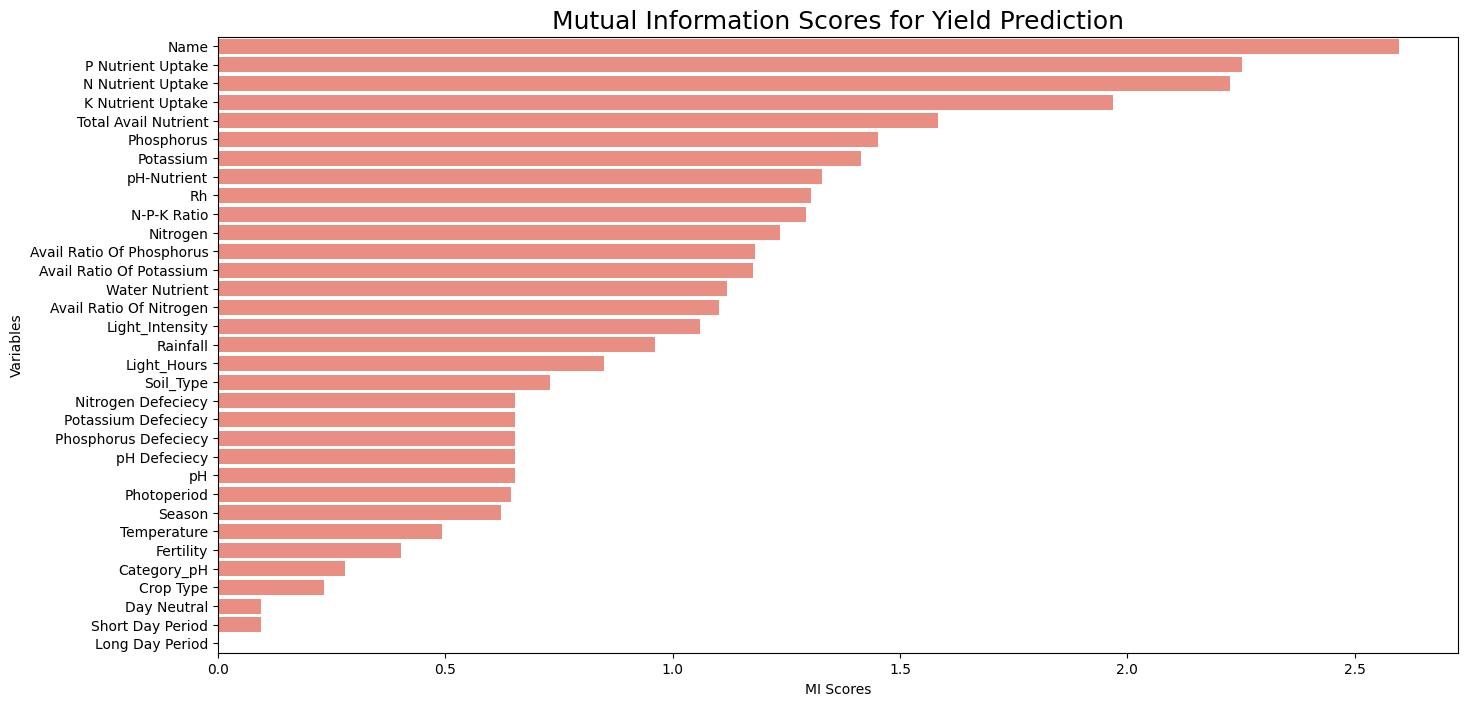

In [39]:
def plot_mi_scores(scores, x, y):
    plt.figure(dpi=100, figsize=(16, 8))
    sns.barplot(x=x, y=y, orient='h', color = "salmon")
    plt.title("Mutual Information Scores for Yield Prediction", fontsize=18)



plot_mi_scores(mi_scores,  mi_scores['MI Scores'], mi_scores['Variables'])

### **Crop Selction Mutual Infomation**

In [40]:
crop_update_mi_2 = crop_update.copy()

In [41]:
for colname in crop_update_mi_2.columns:
  if crop_update_mi_2[colname].dtypes == 'O':
    crop_update_mi_2[colname], _= crop_update_mi_2[colname].factorize()

discrete_features = crop_update_mi_2.dtypes == int

In [42]:
crop_y = crop_update_mi_2.pop('Name')
crop_X = crop_update_mi_2

In [43]:
# Top 10 Result

mi_scores_crop = pd.DataFrame(make_mi_scores(crop_X, crop_y, discrete_features[1:len(discrete_features)])).reset_index().rename(columns={'index':'Variables'})
mi_scores_crop[:10]

Variables  MI Scores
0                 Yield   2.597016
1     P Nutrient Uptake   2.431029
2  Total Avail Nutrient   2.313741
3     N Nutrient Uptake   2.296245
4     K Nutrient Uptake   2.235571
5            Phosphorus   2.186625
6             Potassium   2.164857
7           pH-Nutrient   2.059183
8              Nitrogen   1.974286
9           N-P-K Ratio   1.936160

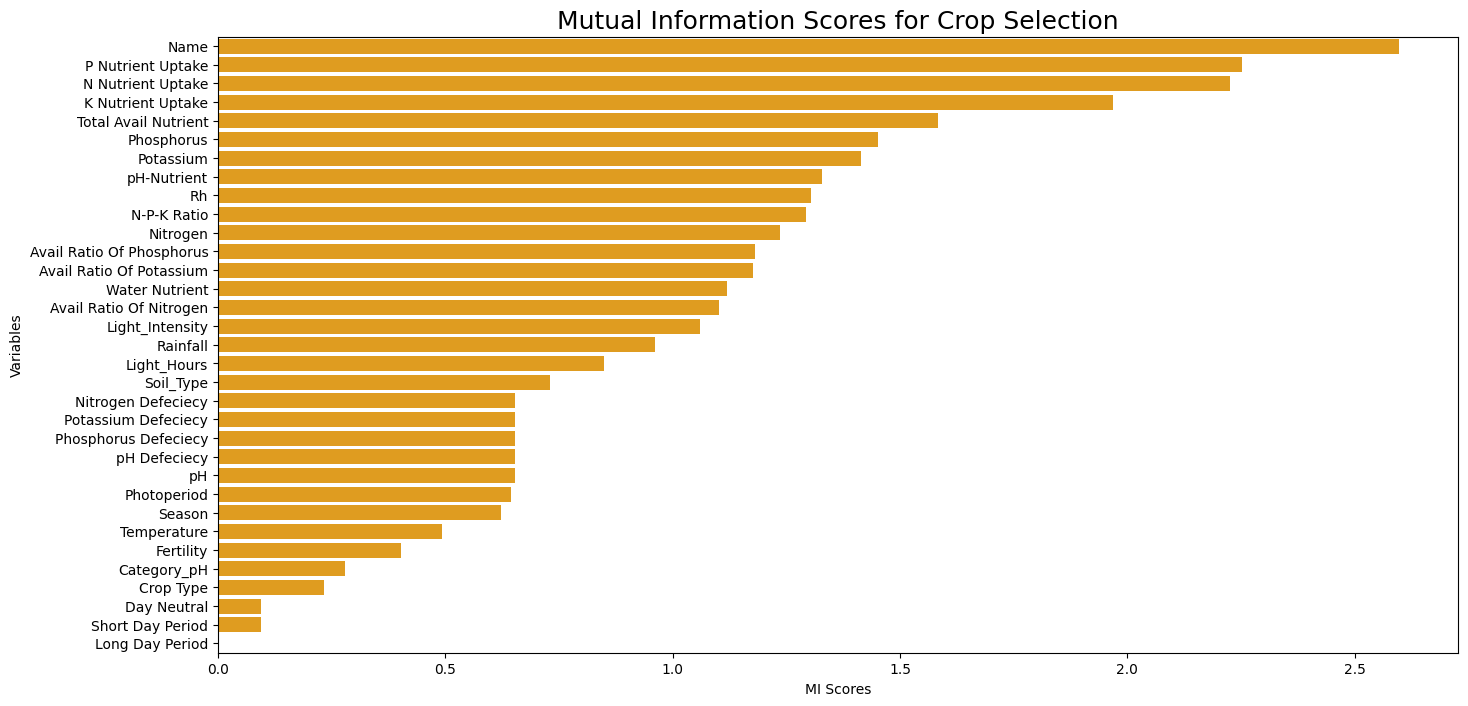

In [44]:
def plot_mi_scores(scores, x, y):
    plt.figure(dpi=100, figsize=(16, 8))
    sns.barplot(x=x, y=y, orient='h', color = "orange")
    plt.title("Mutual Information Scores for Crop Selection", fontsize=18)

plot_mi_scores(mi_scores_crop,  mi_scores['MI Scores'], mi_scores['Variables'])

## Mutual Information for Both Crop Section and Yield Prediction

In [45]:
concat_mi_scores = pd.concat([mi_scores, mi_scores_crop], axis=1)
concat_mi_scores.columns = ['crop selection Variables',	'MI Scores', 'Yield Prediction Variables','MI Scores']
concat_mi_scores

crop selection Variables  MI Scores Yield Prediction Variables  MI Scores
0                        Name   2.597210                      Yield   2.597016
1           P Nutrient Uptake   2.252040          P Nutrient Uptake   2.431029
2           N Nutrient Uptake   2.224512       Total Avail Nutrient   2.313741
3           K Nutrient Uptake   1.967801          N Nutrient Uptake   2.296245
4        Total Avail Nutrient   1.582426          K Nutrient Uptake   2.235571
5                  Phosphorus   1.451709                 Phosphorus   2.186625
6                   Potassium   1.413591                  Potassium   2.164857
7                 pH-Nutrient   1.328777                pH-Nutrient   2.059183
8                          Rh   1.304017                   Nitrogen   1.974286
9                 N-P-K Ratio   1.293008                N-P-K Ratio   1.936160
10                   Nitrogen   1.235139  Avail Ratio Of Phosphorus   1.910249
11  Avail Ratio Of Phosphorus   1.181685    Avail Ratio Of Nitrogen   1.870831
12   Avail Ratio Of Potassium   1.176394   Avail Ratio Of Potassium   1.838428
13             Water Nutrient   1.118335                         Rh   1.824753
14    Avail Ratio Of Nitrogen   1.102575            Light_Intensity   1.707467
15            Light_Intensity   1.060167             Water Nutrient   1.642496
16                   Rainfall   0.960118                   Rainfall   1.498880
17                Light_Hours   0.849702                Light_Hours   1.308898
18                  Soil_Type   0.729970         Nitrogen Defeciecy   1.200594
19         Nitrogen Defeciecy   0.653436        Potassium Defeciecy   1.200594
20        Potassium Defeciecy   0.653436               pH Defeciecy   1.200594
21       Phosphorus Defeciecy   0.653436                         pH   1.200594
22               pH Defeciecy   0.653436       Phosphorus Defeciecy   1.200594
23                         pH   0.653436                  Soil_Type   1.129088
24                Photoperiod   0.644207                     Season   1.080805
25                     Season   0.622760                Photoperiod   1.032396
26                Temperature   0.492009                  Fertility   0.946129
27                  Fertility   0.401716                Temperature   0.864882
28                Category_pH   0.279025                Category_pH   0.641728
29                  Crop Type   0.233763                  Crop Type   0.578157
30                Day Neutral   0.093635                Day Neutral   0.132927
31           Short Day Period   0.093635           Short Day Period   0.132927
32            Long Day Period   0.000000            Long Day Period   0.000206

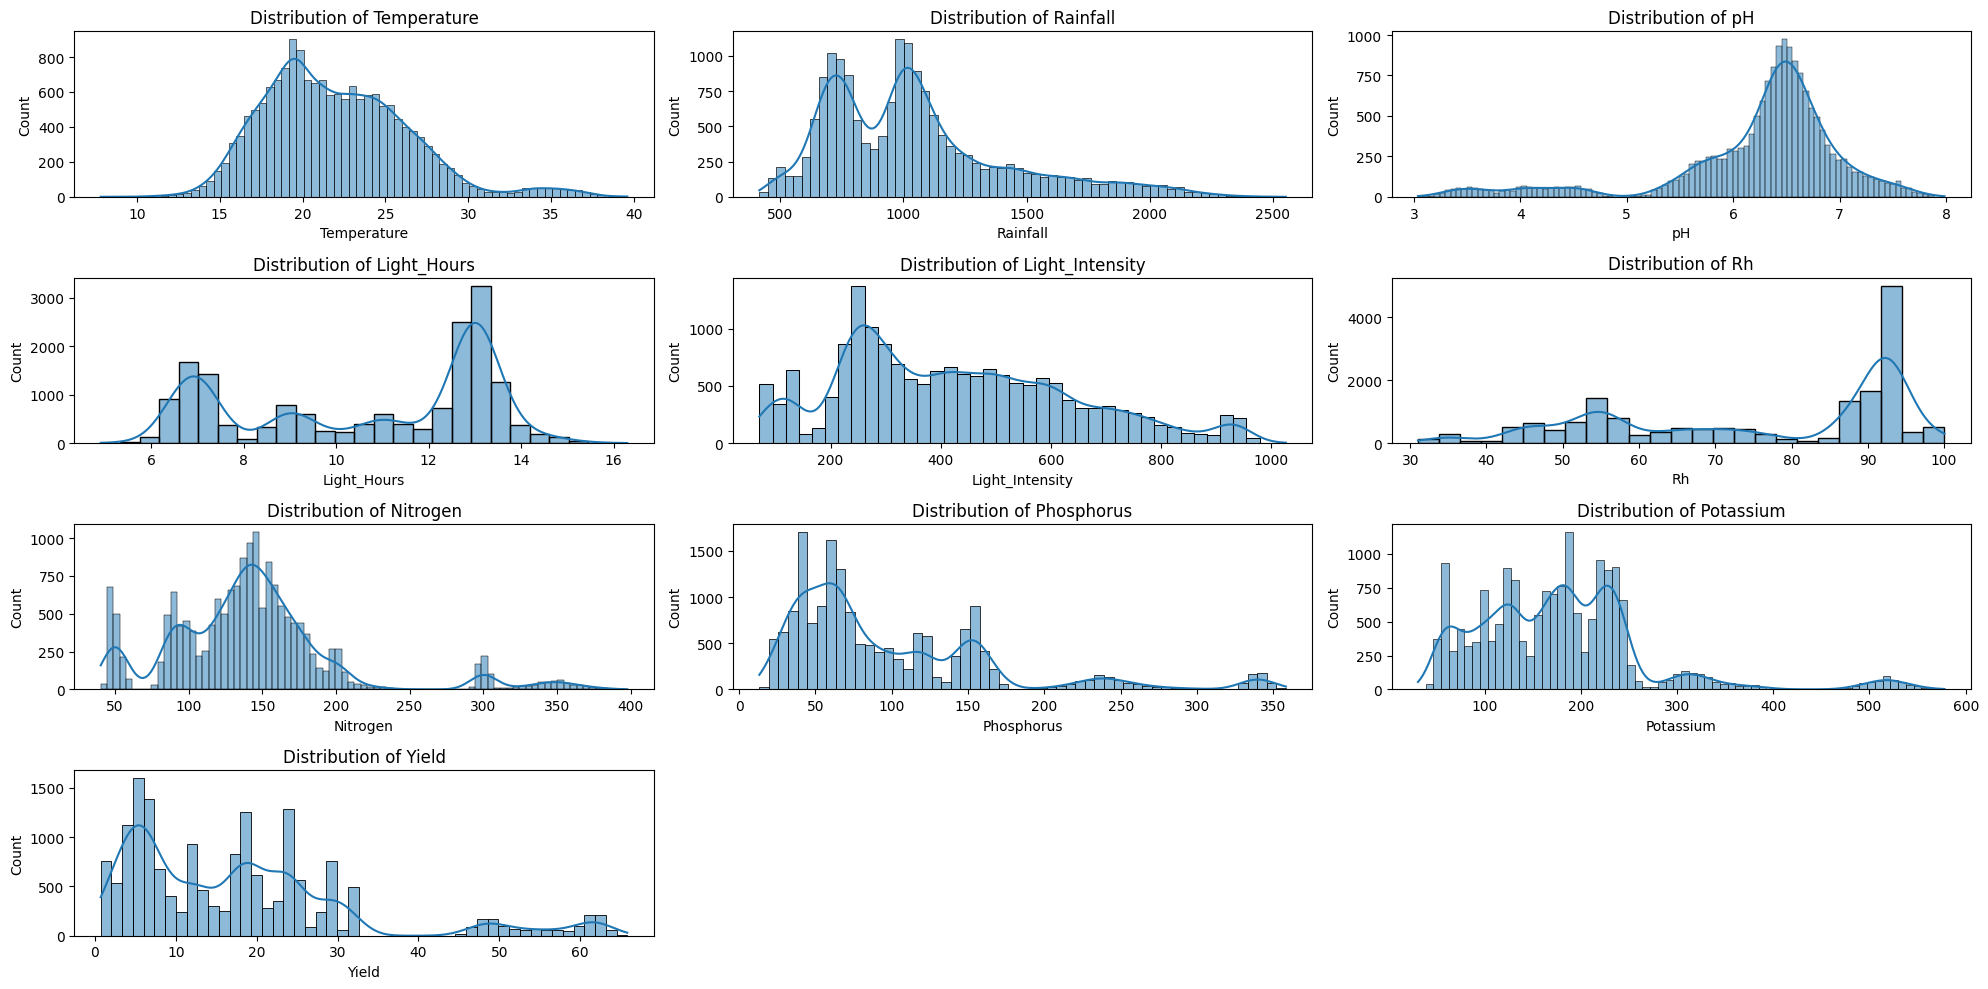

In [46]:
#histograms for each continuous variable

plt.figure(figsize=(20, 10))

for i, var in enumerate(num_col, 1):
    plt.subplot(4, 3, i)
    sns.histplot(crop[var], kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

In [47]:
# Skew for Continoues Variable

skew_bank = []
for i, var in enumerate(num_col, 1):
  skew_bank.append(crop[var].skew())
skews = pd.DataFrame({'num_col':num_col, 'skew':skew_bank})

In [48]:
fig = px.bar(skews, y='skew', x='num_col', color='num_col', title="Bar plot Showing Skew for Numerical Columns")
fig.show()

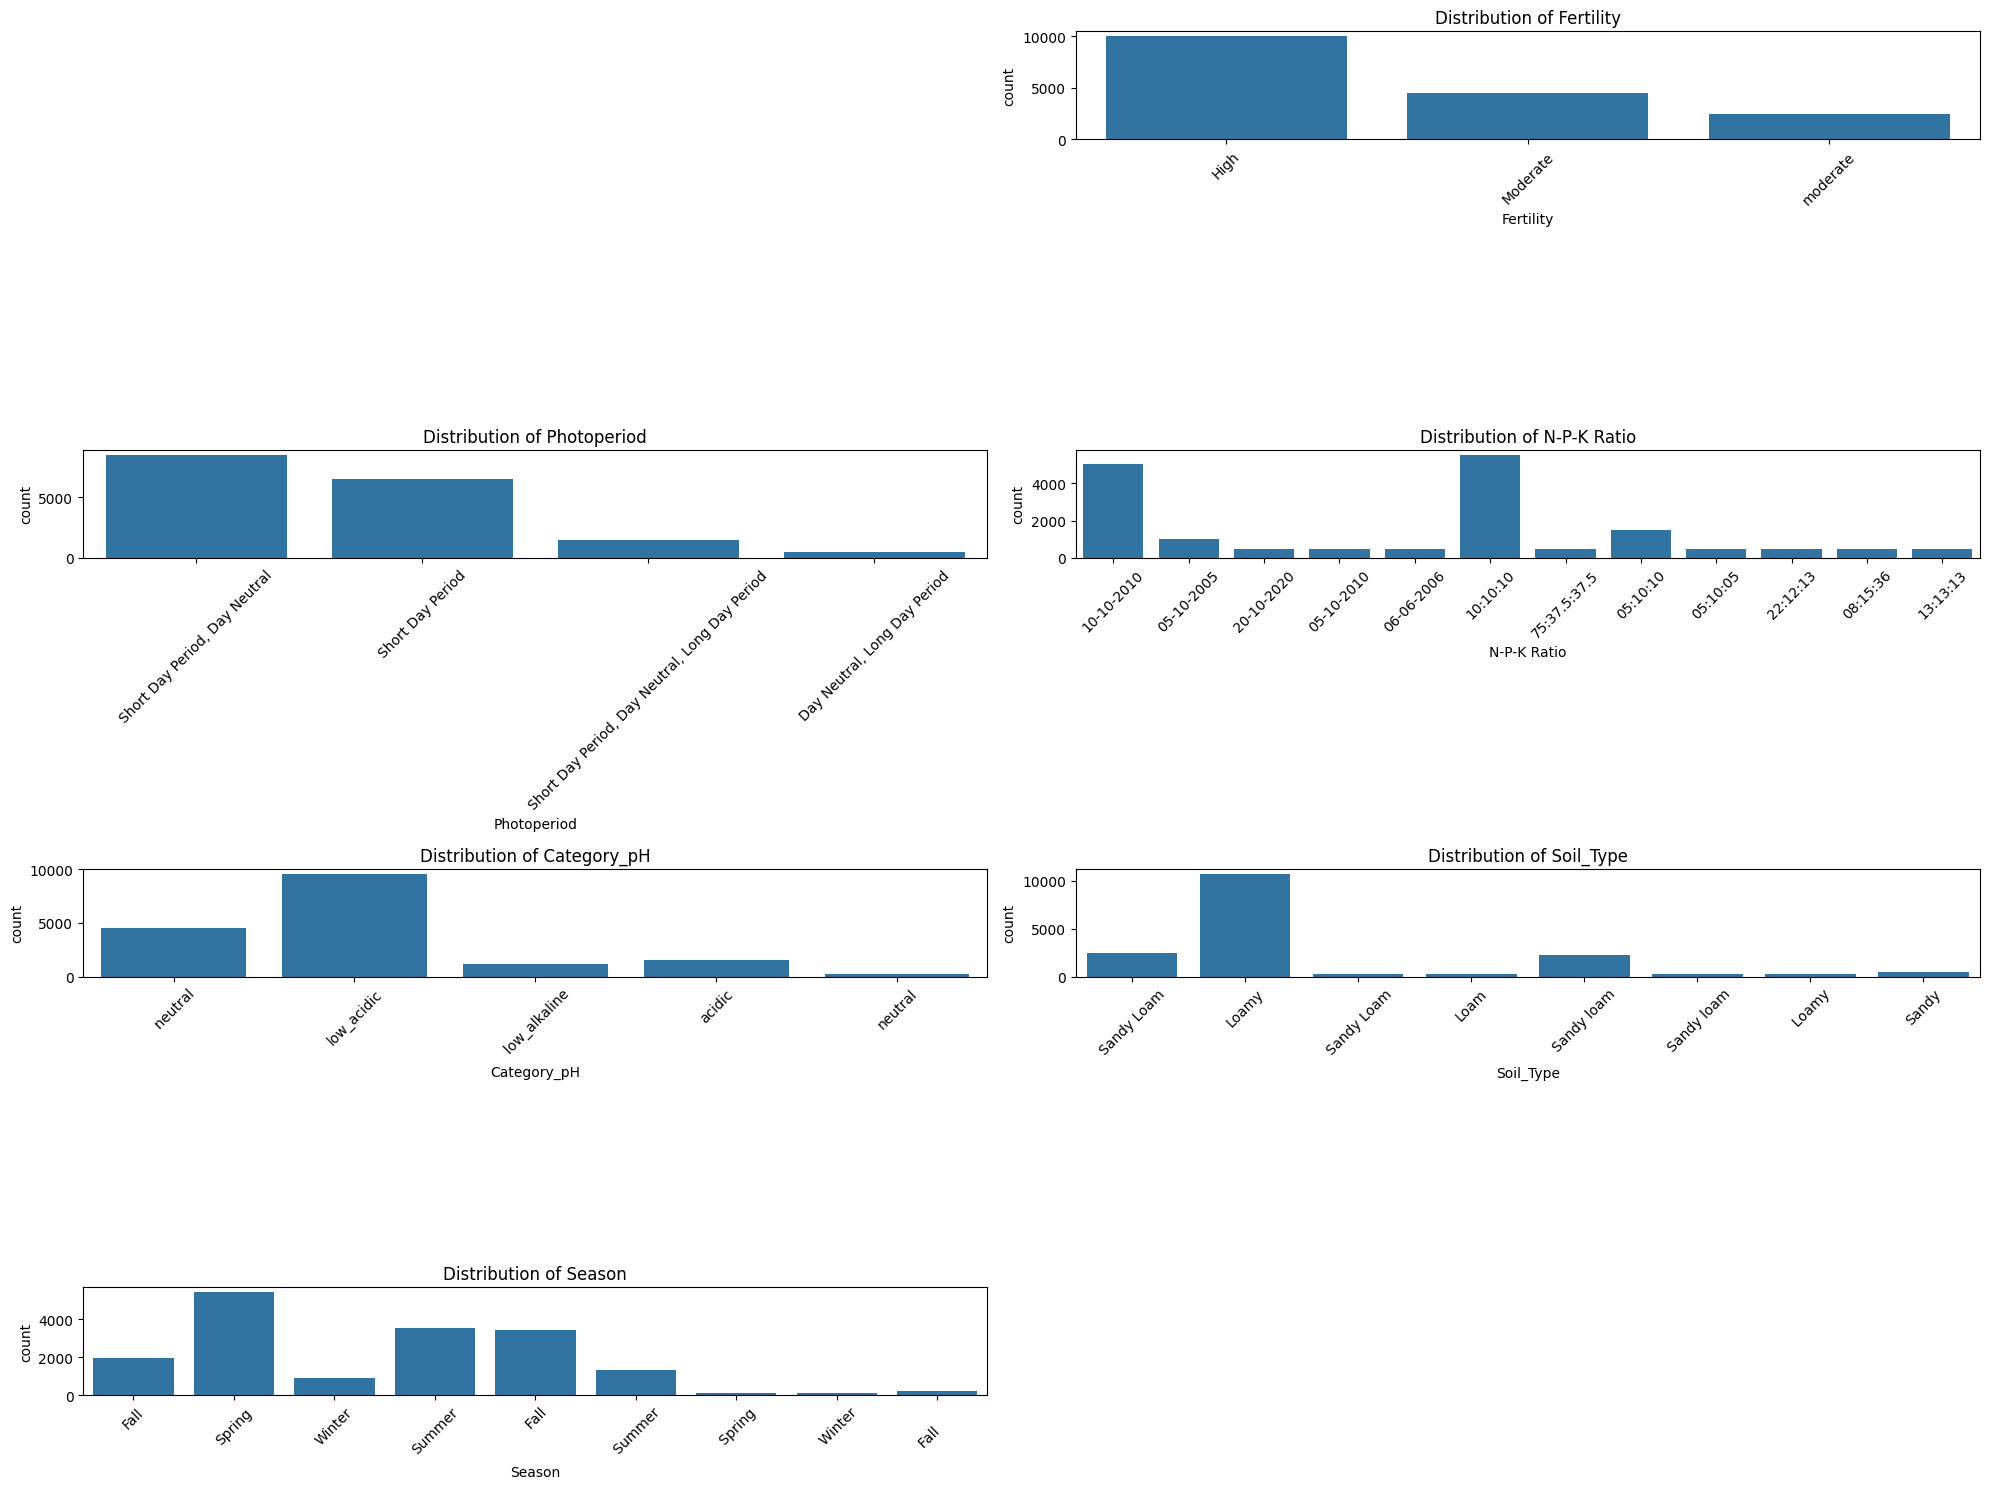

In [52]:
# Show Distribution for Categorical Variable

plt.figure(figsize=(20, 15))

for i, var in enumerate(cat_col, 1):
    if var != 'Name':
        plt.subplot(4, 2, i,)
        sns.countplot(crop, x=crop[var])
        plt.title(f'Distribution of {var}')
        plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

In [50]:
cat_col

Index(['Name', 'Fertility', 'Photoperiod', 'N-P-K Ratio', 'Category_pH',
       'Soil_Type', 'Season'],
      dtype='object')

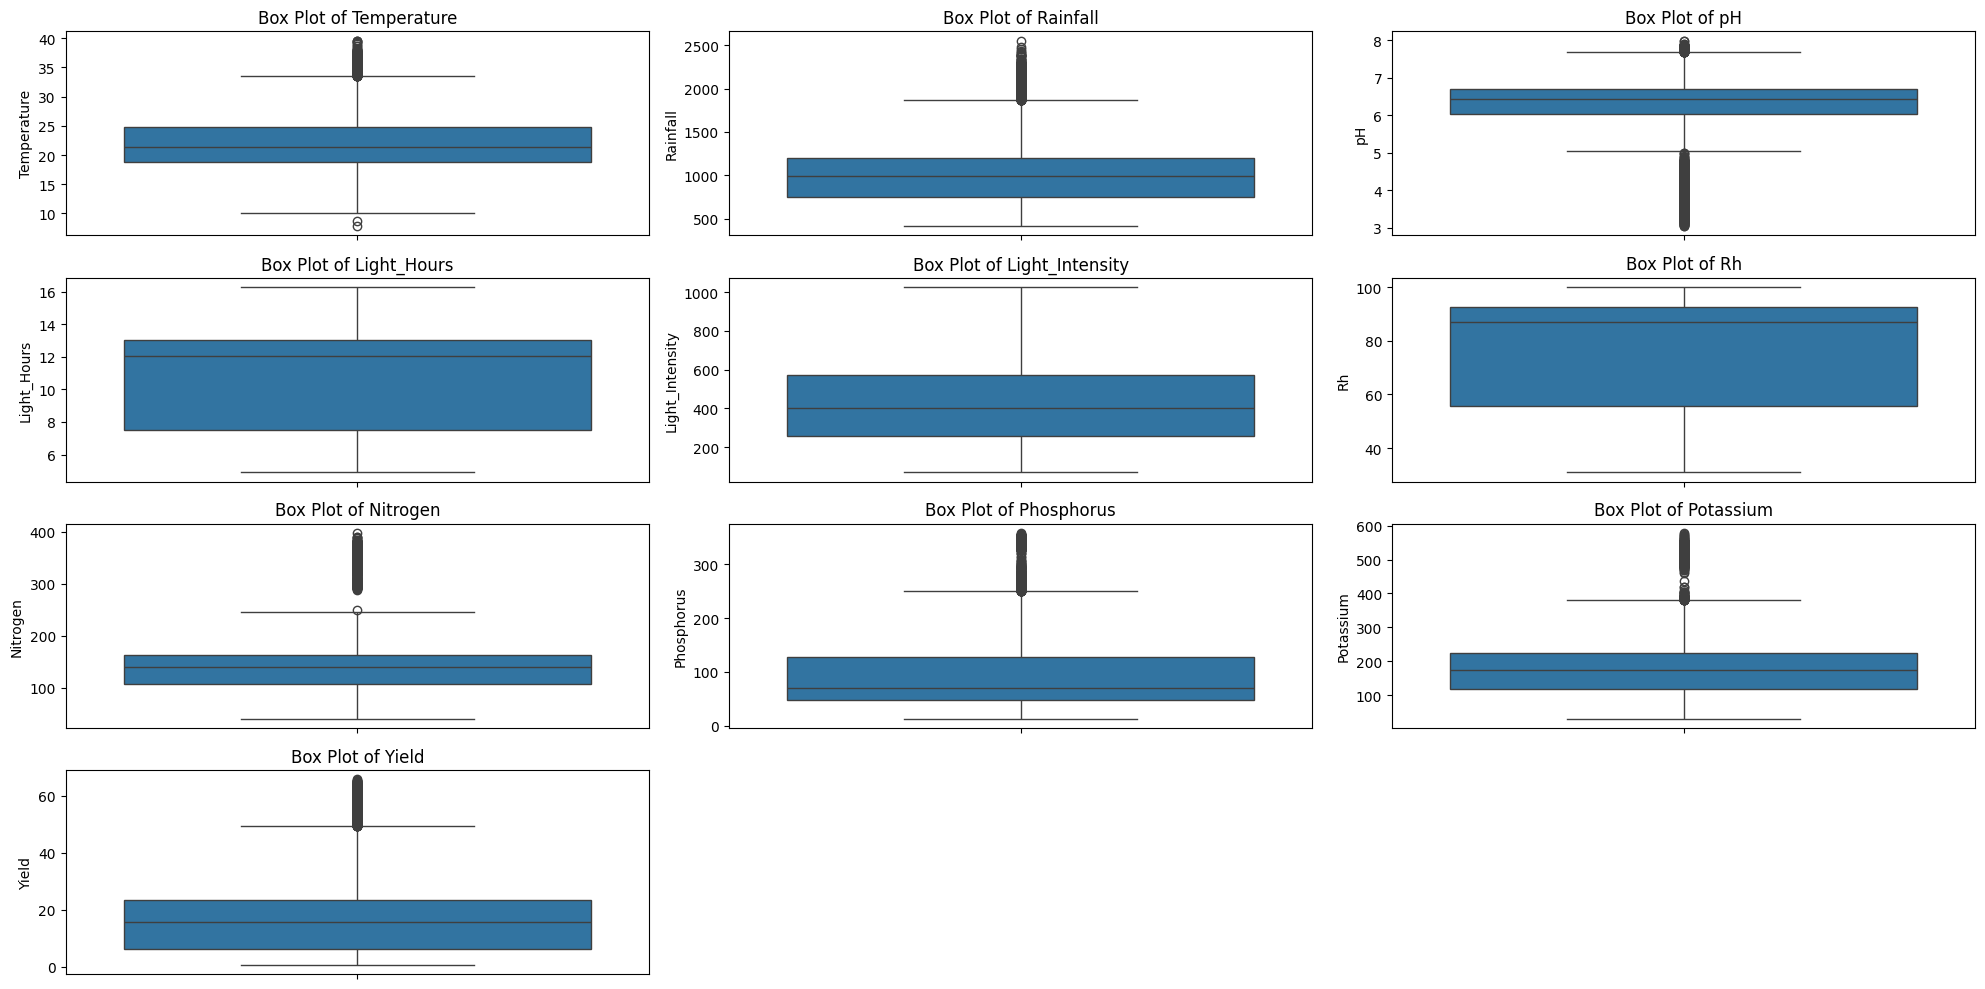

In [51]:
# Box plots for each continuous variable
plt.figure(figsize=(20, 10))

for i, var in enumerate(num_col, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=crop[var])
    plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()